<a href="https://colab.research.google.com/github/sradhass88/ICT-Internship-on-Salary-Prediction-and-Job-Analysis-Using-Machine-Learning/blob/main/Sradha_Internship_Salary_Prediction_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Salary Prediction and Job Analysis Using Machine Learning***

**Week 1: Data Understanding, Cleaning, and EDA**

# Data Loading and Inspection:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('/content/dsa_job - data_science_job.csv')
# Display the first few rows of the dataset
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [3]:
df.shape

(5000, 12)

In [4]:
df.dtypes

,0
work_year,int64
job_title,object
job_category,object
salary_currency,object
salary,int64
salary_in_usd,int64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object


In [5]:
# Check for any missing or inconsistent values
df.isnull().sum()

,0
work_year,0
job_title,0
job_category,500
salary_currency,500
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [6]:
# Check the basic statistics of numeric columns
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [7]:
df['job_title'].value_counts()

,count
job_title,
Data Engineer in office,372
Data Engineer,355
Statistician,354
Data Scientist,353
Data Analyst in office,339
Data Engineer (Remote),338
Data Analyst (Remote),336
Machine Learning Engineer in office,331
Data Scientist in office,330


In [8]:
df['job_category'].value_counts()

,count
job_category,
Data Science,1173
ML/AI,1151
Analysis,1108
Engineering,1068


# **Data Cleaning and Data Transform**- Handle missing values

***Using re to fill missing values on job category with respect to job titles***

-The re module in Python allows you to work with regular expressions to perform searches, matches, and replacements on text data and re.search(): Searches for a pattern in a string and returns a match object if found.

In [9]:
import re

def categorize_job_category(job_title):
    # Define a dictionary with keywords and corresponding categories
    job_keywords = {
        'Analyst': r'Data Analyst',
        'Engineering': r'Data Engineer',
        'Data Science': r'Data Scientist',
        'ML/AI': r'Machine Learning Engineer',
        'Quantitative Analysis': r'Statistician'
    }

    # Iterate over the dictionary and check if any keyword matches the job title
    for category, pattern in job_keywords.items():
        if re.search(pattern, job_title, re.IGNORECASE):
            return category

    # If no category matches, return 'Other'
    return 'Other'

# Apply the function to categorize job titles
df['job_category'] = df['job_title'].apply(categorize_job_category)


In [10]:
# Display the updated DataFrame to verify
df[['job_title', 'job_category']].head(20)

,job_title,job_category
0,Machine Learning Engineer in office,ML/AI
1,Statistician (Remote),Quantitative Analysis
2,Machine Learning Engineer,ML/AI
3,Data Analyst in office,Analyst
4,Statistician,Quantitative Analysis
5,Machine Learning Engineer,ML/AI
6,Data Analyst in office,Analyst
7,Data Scientist (Remote),Data Science
8,Data Analyst,Analyst
9,Statistician (Remote),Quantitative Analysis


In [11]:
df['company_location'].value_counts()

,count
company_location,
UK,789
DE,726
MX,713
IN,708
CN,697
US,684
JP,683


In [12]:
df['salary_currency'].value_counts()

,count
salary_currency,
EUR,962
INR,916
JPY,891
us dolars,875
GBP,856


***To categorize and fill salary currencies based on company location***

In [13]:
def categorize_salary_currency(company_location):
    # Define a dictionary with company locations and corresponding salary currencies
    location_to_currency = {
        'UK': 'GBP',
        'DE': 'EUR',
        'MX': 'MXN',
        'IN': 'INR',
        'CN': 'CNY',
        'US': 'USD'
    }

    # Iterate over the dictionary and check if any location matches
    for location, currency in location_to_currency.items():
        if re.search(location, company_location, re.IGNORECASE):
            return currency

    # If no match is found, return 'JPY' as the default
    return 'JPY'

# Apply the function to categorize salary currencies based on company location
df['salary_currency'] = df['company_location'].apply(categorize_salary_currency)

In [14]:
# Display the updated DataFrame to verify
df[['salary_currency', 'company_location']].head(10)

,salary_currency,company_location
0,EUR,DE
1,INR,IN
2,CNY,CN
3,MXN,MX
4,GBP,UK
5,EUR,DE
6,EUR,DE
7,JPY,JP
8,EUR,DE
9,USD,US


***To categorize and fill work setting column wrt job tittle column***

In [15]:
def categorize_work_setting(job_title):
    if re.search(r'Remote', job_title, re.IGNORECASE):
        return 'Remote'
    elif re.search(r'office', job_title, re.IGNORECASE):
        return 'In-person'
    else:
        return 'Hybrid'

# Apply the function to categorize work setting using job tittle
df['work_setting'] = df['job_title'].apply(categorize_work_setting)

In [16]:
# Display the updated DataFrame to verify
df[['work_setting', 'job_title']].head(20)

,work_setting,job_title
0,In-person,Machine Learning Engineer in office
1,Remote,Statistician (Remote)
2,Hybrid,Machine Learning Engineer
3,In-person,Data Analyst in office
4,Hybrid,Statistician
5,Hybrid,Machine Learning Engineer
6,In-person,Data Analyst in office
7,Remote,Data Scientist (Remote)
8,Hybrid,Data Analyst
9,Remote,Statistician (Remote)


***Fill missing values in 'company_size'  and 'experience_level' with the mode value of the column***

In [17]:
# Fill missing values in 'company_size' with the mode of the column
company_size_mode = df['company_size'].mode()[0]
df['company_size'] = df['company_size'].fillna(company_size_mode)

# Fill missing values in 'experience_level' with the mode of the column
experience_level_mode = df['experience_level'].mode()[0]
df['experience_level'] = df['experience_level'].fillna(experience_level_mode)

In [18]:
# Display the updated DataFrame to check null values
print(df[['company_size', 'experience_level']].isna().sum())  # To verify no NaN values remain

company_size        0
experience_level    0
dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        5000 non-null   object
 3   salary_currency     5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    5000 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        5000 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [20]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [21]:
df.head(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analysis,INR,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analyst,MXN,154130,135242,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analysis,GBP,172312,35156,UK,MI,FT,Hybrid,UK,S
5,2020,Machine Learning Engineer,ML/AI,EUR,36544,68280,CN,MI,FT,Hybrid,DE,M
6,2022,Data Analyst in office,Analyst,EUR,178404,105324,DE,EX,PT,In-person,DE,L
7,2021,Data Scientist (Remote),Data Science,JPY,187908,90706,UK,EX,CT,Remote,JP,M
8,2022,Data Analyst,Analyst,EUR,-44388,171043,UK,SE,FL,Hybrid,DE,S
9,2022,Statistician (Remote),Quantitative Analysis,USD,31694,73408,DE,EN,CT,Remote,US,S


In [22]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [23]:
df[df['salary'] < 0]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
8,2022,Data Analyst,Analyst,EUR,-44388,171043,UK,SE,FL,Hybrid,DE,S
23,2021,Statistician,Quantitative Analysis,JPY,-112757,124951,DE,SE,FT,Hybrid,JP,S
29,2022,Data Engineer,Engineering,EUR,-142296,174973,DE,SE,FL,Hybrid,DE,S
33,2021,Machine Learning Engineer,ML/AI,CNY,-92552,196759,IN,SE,CT,Hybrid,CN,S
65,2021,Data Scientist in office,Data Science,EUR,-159688,135424,DE,SE,FL,In-person,DE,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4863,2020,Data Engineer (Remote),Engineering,USD,-178351,87596,US,SE,CT,Remote,US,S
4866,2020,Machine Learning Engineer in office,ML/AI,JPY,-170723,128145,CN,SE,FT,In-person,JP,S
4878,2022,Data Scientist (Remote),Data Science,JPY,-109428,103630,JP,SE,PT,Remote,JP,S
4902,2022,Data Analyst in office,Analyst,USD,-33302,80985,CN,SE,PT,In-person,US,S


In [24]:
# Replace '-' with an empty string in 'salary_in_usd' and convert to numeric
df['salary'] = df['salary'].astype(str).str.replace('-', '', regex=False)
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')


In [25]:
df[df['salary'] < 0]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size


In [26]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,114201.052800,114076.995800
std,0.81951,48900.704986,49113.807687
min,2020.00000,30018.000000,30016.000000
25%,2020.00000,71946.500000,71343.750000
50%,2021.00000,115008.500000,114167.000000
75%,2022.00000,155858.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


# Exploratory Data Analysis (EDA)

# Generate descriptive statistics


In [27]:
# Generate descriptive statistics for all numeric columns
numeric_descriptive_stats = df.describe()

# Display the summary statistics
print("Descriptive Statistics for Numeric Columns:\n")
print(numeric_descriptive_stats)


Descriptive Statistics for Numeric Columns:

        work_year         salary  salary_in_usd
count  5000.00000    5000.000000    5000.000000
mean   2020.97680  114201.052800  114076.995800
std       0.81951   48900.704986   49113.807687
min    2020.00000   30018.000000   30016.000000
25%    2020.00000   71946.500000   71343.750000
50%    2021.00000  115008.500000  114167.000000
75%    2022.00000  155858.750000  156665.750000
max    2022.00000  199924.000000  199985.000000


 # Univariate Analysis

In [28]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']
cat_cols

['job_title',
 'job_category',
 'salary_currency',
 'employee_residence',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_location',
 'company_size']

In [29]:
num_cols=[col for col in df.columns if df[col].dtype !='object']
num_cols

['work_year', 'salary', 'salary_in_usd']

 # Univariate Analysis- Categorical Columns

                                      job_title  Ratio
job_title                                             
Data Engineer  in office                    372   7.44
Data Engineer                               355   7.10
Statistician                                354   7.08
Data Scientist                              353   7.06
Data Analyst  in office                     339   6.78
Data Engineer  (Remote)                     338   6.76
Data Analyst  (Remote)                      336   6.72
Machine Learning Engineer  in office        331   6.62
Data Scientist  in office                   330   6.60
Machine Learning Engineer  (Remote)         327   6.54
Statistician  (Remote)                      323   6.46
Statistician  in office                     317   6.34
Data Scientist  (Remote)                    310   6.20
Data Analyst                                309   6.18
Machine Learning Engineer                   306   6.12

--------------------------------------------



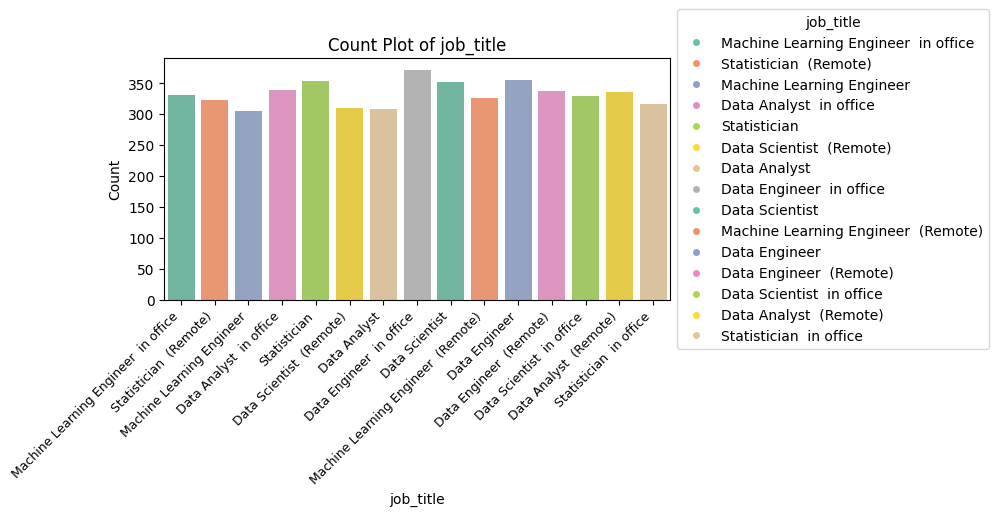

                       job_category  Ratio
job_category                              
Engineering                    1065  21.30
Quantitative Analysis           994  19.88
Data Science                    993  19.86
Analyst                         984  19.68
ML/AI                           964  19.28

--------------------------------------------



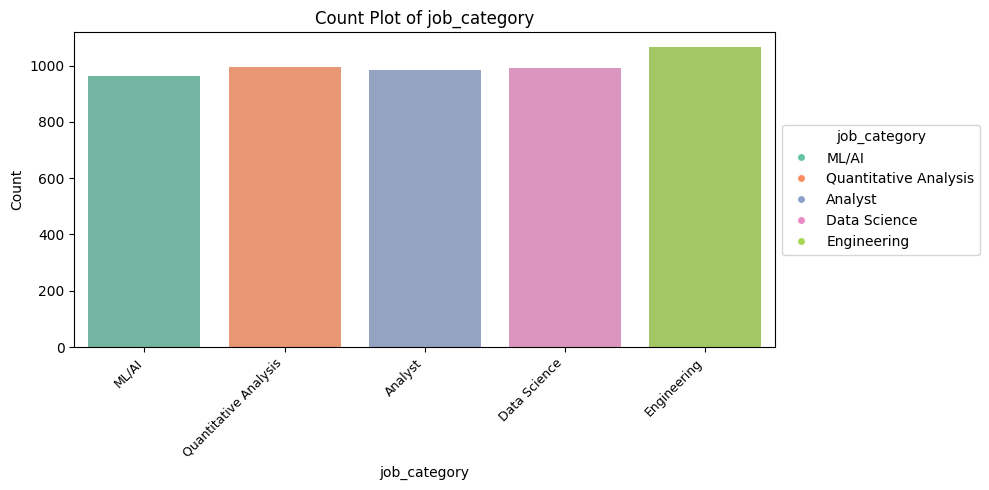

                 salary_currency  Ratio
salary_currency                        
GBP                          789  15.78
EUR                          726  14.52
MXN                          713  14.26
INR                          708  14.16
CNY                          697  13.94
USD                          684  13.68
JPY                          683  13.66

--------------------------------------------



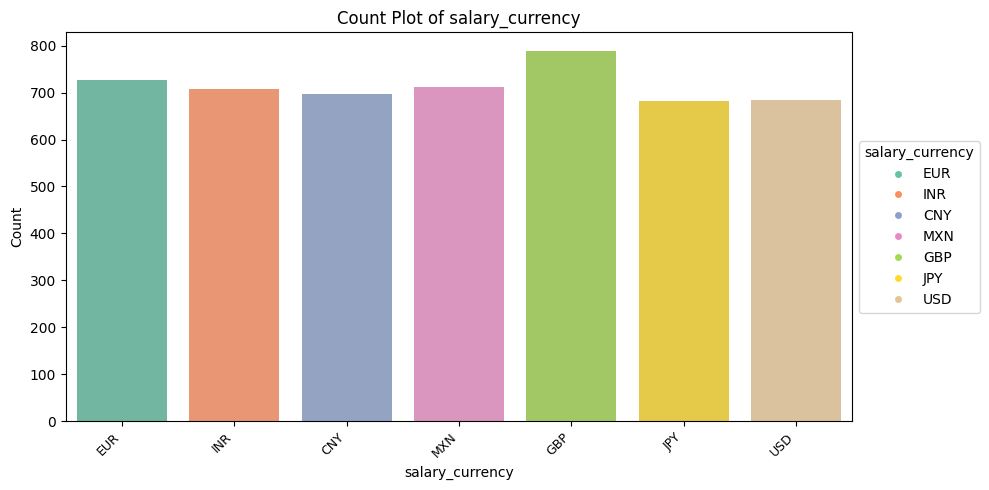

                    employee_residence  Ratio
employee_residence                           
JP                                 783  15.66
IN                                 741  14.82
US                                 721  14.42
DE                                 706  14.12
MX                                 705  14.10
CN                                 674  13.48
UK                                 670  13.40

--------------------------------------------



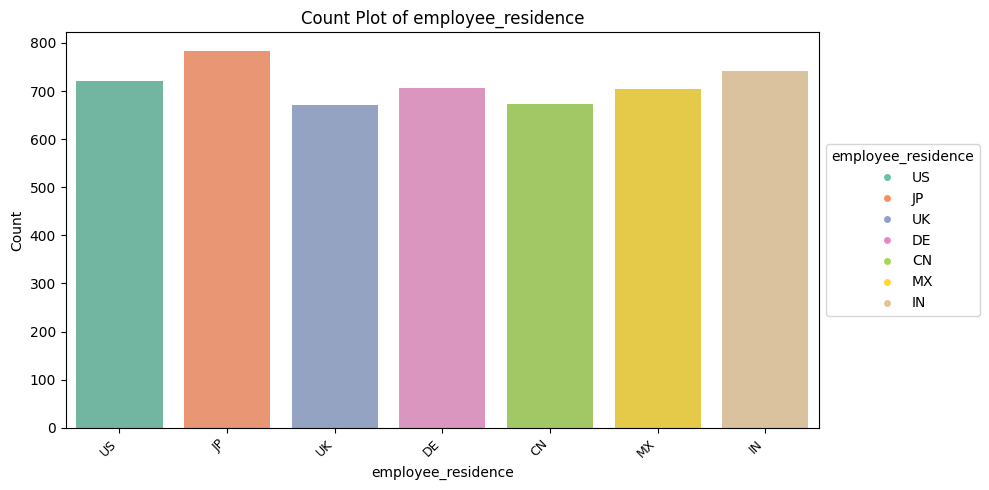

                  experience_level  Ratio
experience_level                         
SE                            1654  33.08
EX                            1119  22.38
EN                            1115  22.30
MI                            1112  22.24

--------------------------------------------



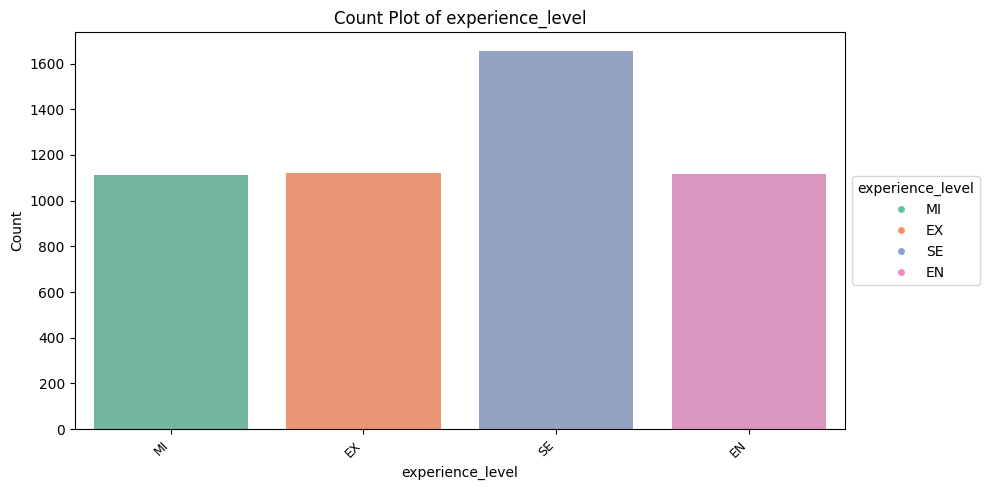

                 employment_type  Ratio
employment_type                        
PT                          1268  25.36
FL                          1263  25.26
FT                          1245  24.90
CT                          1224  24.48

--------------------------------------------



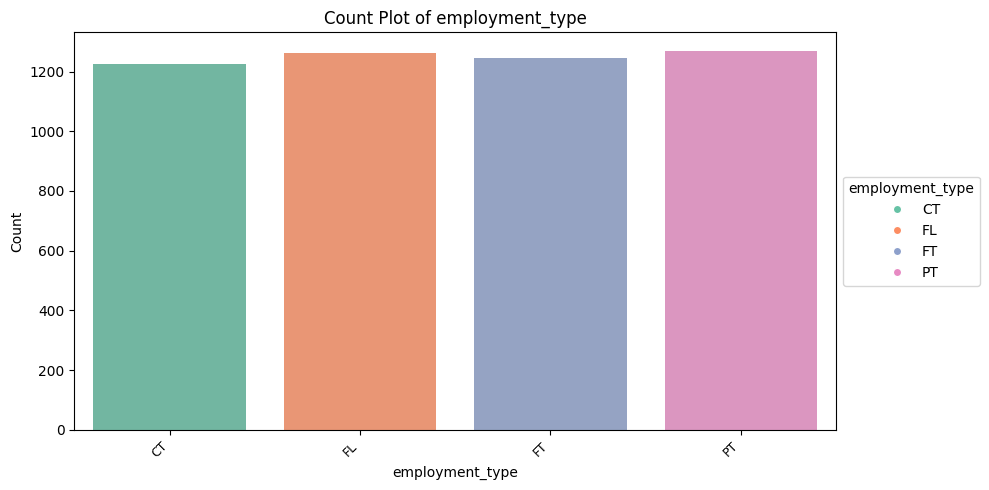

              work_setting  Ratio
work_setting                     
In-person             1689  33.78
Hybrid                1677  33.54
Remote                1634  32.68

--------------------------------------------



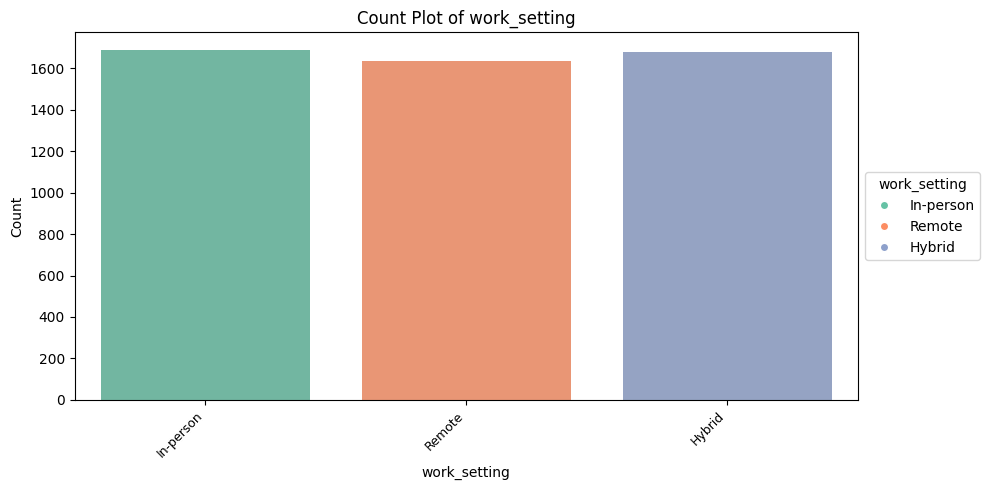

                  company_location  Ratio
company_location                         
UK                             789  15.78
DE                             726  14.52
MX                             713  14.26
IN                             708  14.16
CN                             697  13.94
US                             684  13.68
JP                             683  13.66

--------------------------------------------



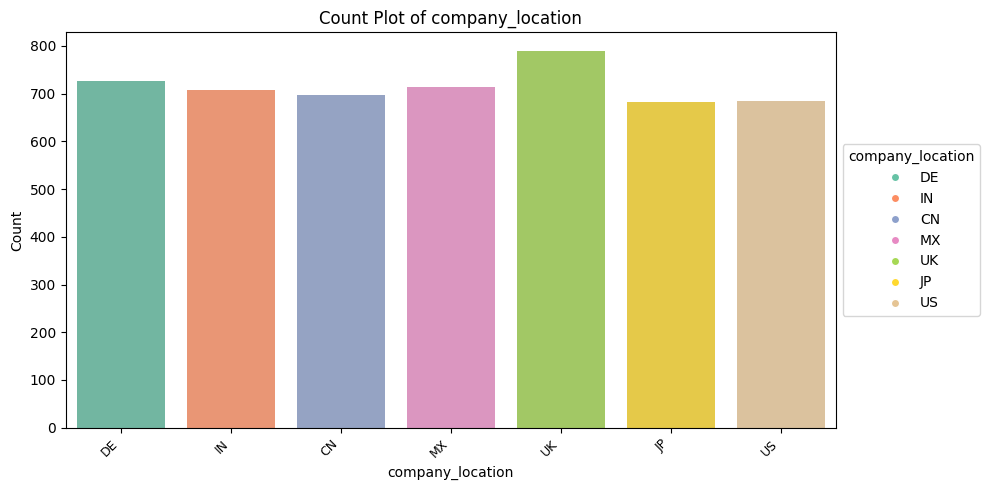

              company_size  Ratio
company_size                     
S                     2019  40.38
M                     1517  30.34
L                     1464  29.28

--------------------------------------------



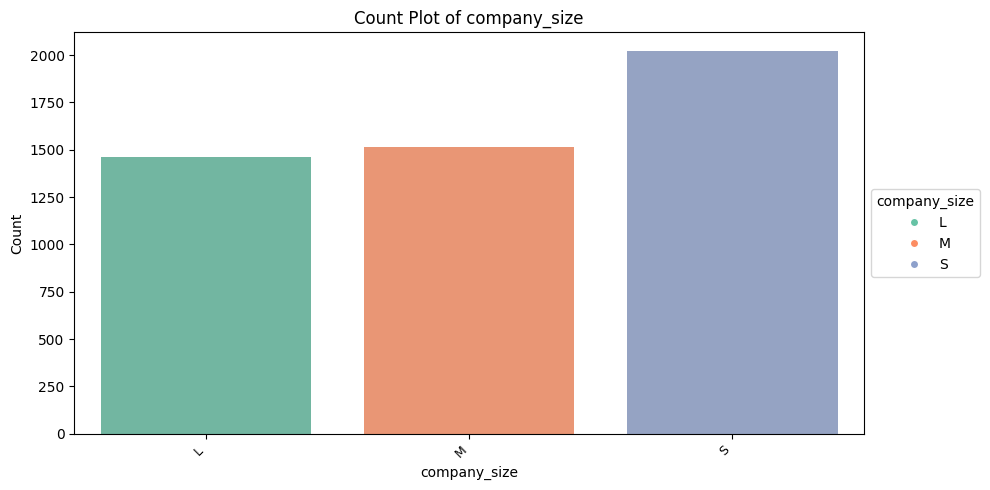

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def cat_summary(dataframe, col_name, plot=False):
    # Print summary table of value counts and their ratios
    value_counts = dataframe[col_name].value_counts()
    ratio = 100 * value_counts / len(dataframe)

    summary_df = pd.DataFrame({col_name: value_counts, "Ratio": ratio})
    print(summary_df)
    print("\n--------------------------------------------\n")

    # Plot if plot=True
    if plot:
        # Set color palette size based on unique values in col_name
        unique_values = dataframe[col_name].unique()
        palette = sns.color_palette("Set2", n_colors=len(unique_values))

        # Adjusted figure size for better fitting
        plt.figure(figsize=(10, 5))

        # Count plot with col_name as hue and legend set to False
        ax = sns.countplot(x=col_name, data=dataframe, hue=col_name, palette=palette, legend=False)

        # Set labels and title
        plt.xlabel(col_name)
        plt.ylabel("Count")
        plt.title(f"Count Plot of {col_name}")

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right', fontsize=9)

        # Manually create the legend
        handles = [plt.Line2D([0], [0], marker='o', color='w', label=value, markerfacecolor=palette[i])
                   for i, value in enumerate(unique_values)]

        # Adjust legend position to the right side of the plot
        plt.legend(title=col_name, handles=handles, loc="center left", bbox_to_anchor=(1, 0.5))

        # Adjust layout to prevent clipping and ensure everything fits
        plt.tight_layout()
        plt.show()


# Run the summary and plot for each column in cat_cols
for col in cat_cols:
    cat_summary(df, col, plot=True)


# Univariate Analysis- Numerical Columns


*************** work_year ***************

count    5000.00000
mean     2020.97680
std         0.81951
min      2020.00000
25%      2020.00000
50%      2021.00000
75%      2022.00000
max      2022.00000
Name: work_year, dtype: float64


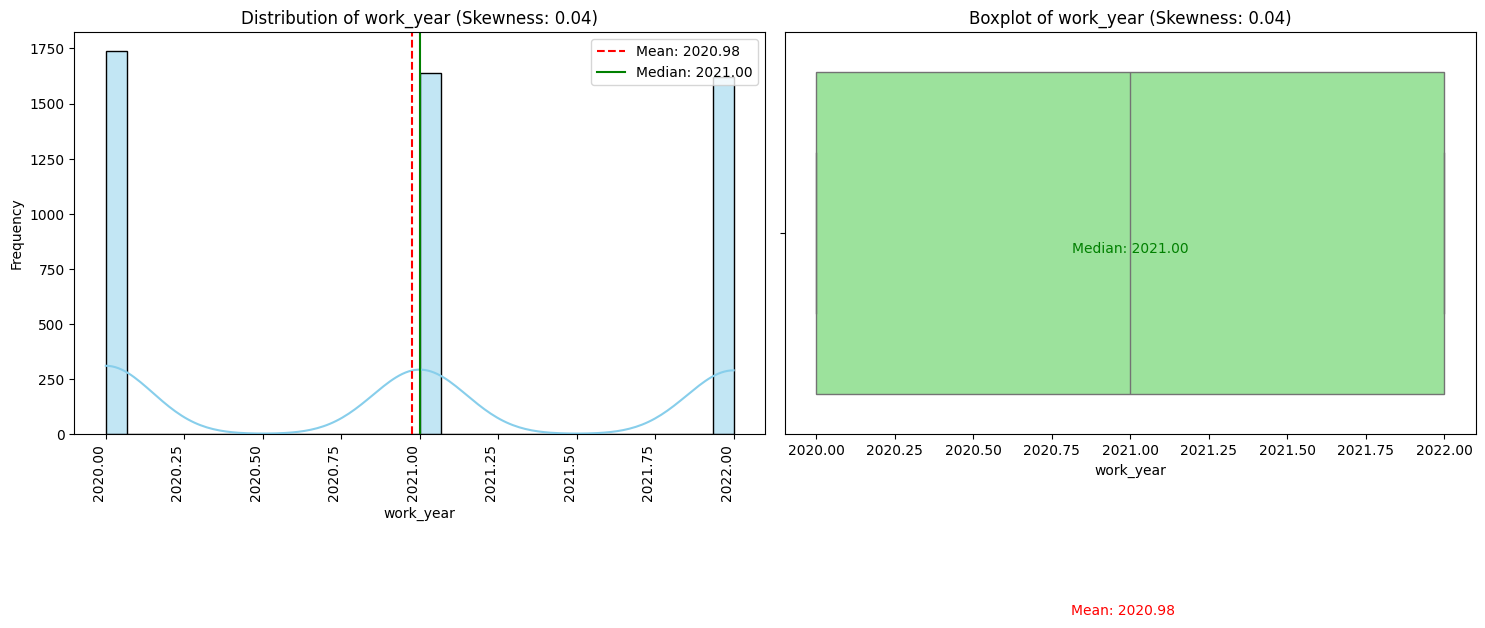


*************** salary ***************

count      5000.000000
mean     114201.052800
std       48900.704986
min       30018.000000
25%       71946.500000
50%      115008.500000
75%      155858.750000
max      199924.000000
Name: salary, dtype: float64


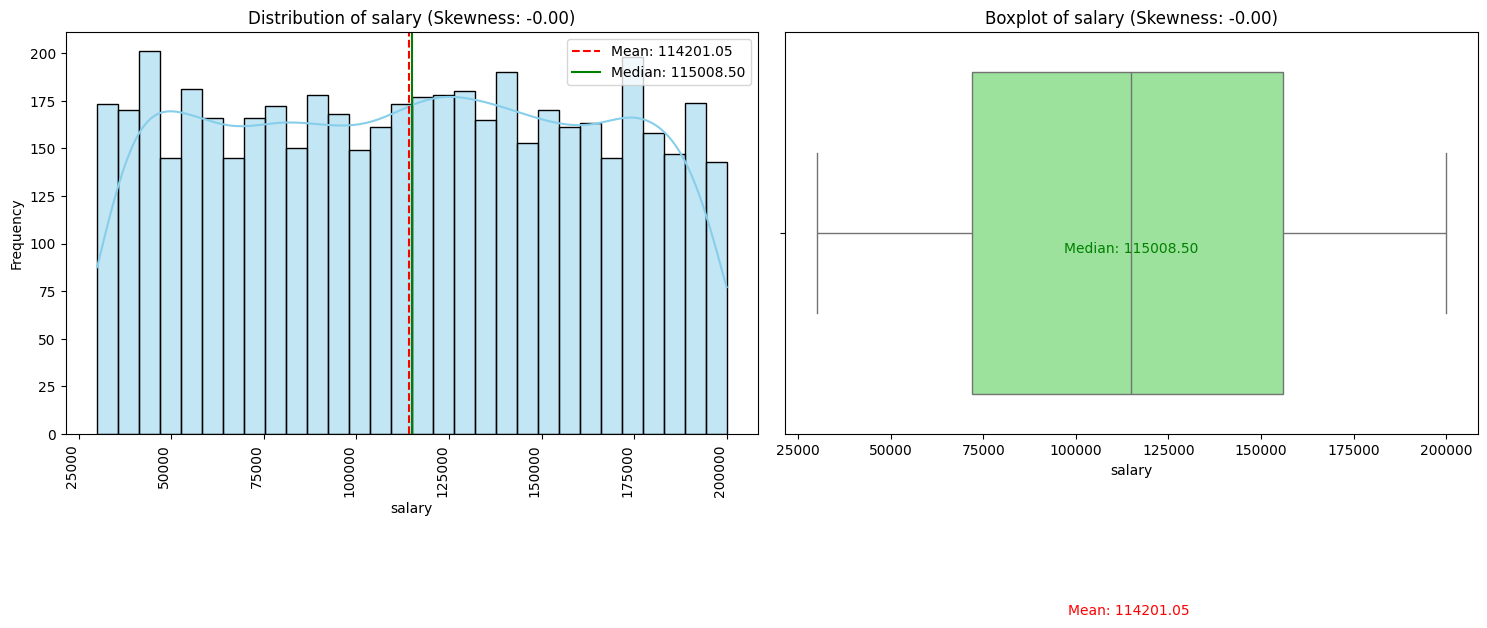


*************** salary_in_usd ***************

count      5000.000000
mean     114076.995800
std       49113.807687
min       30016.000000
25%       71343.750000
50%      114167.000000
75%      156665.750000
max      199985.000000
Name: salary_in_usd, dtype: float64


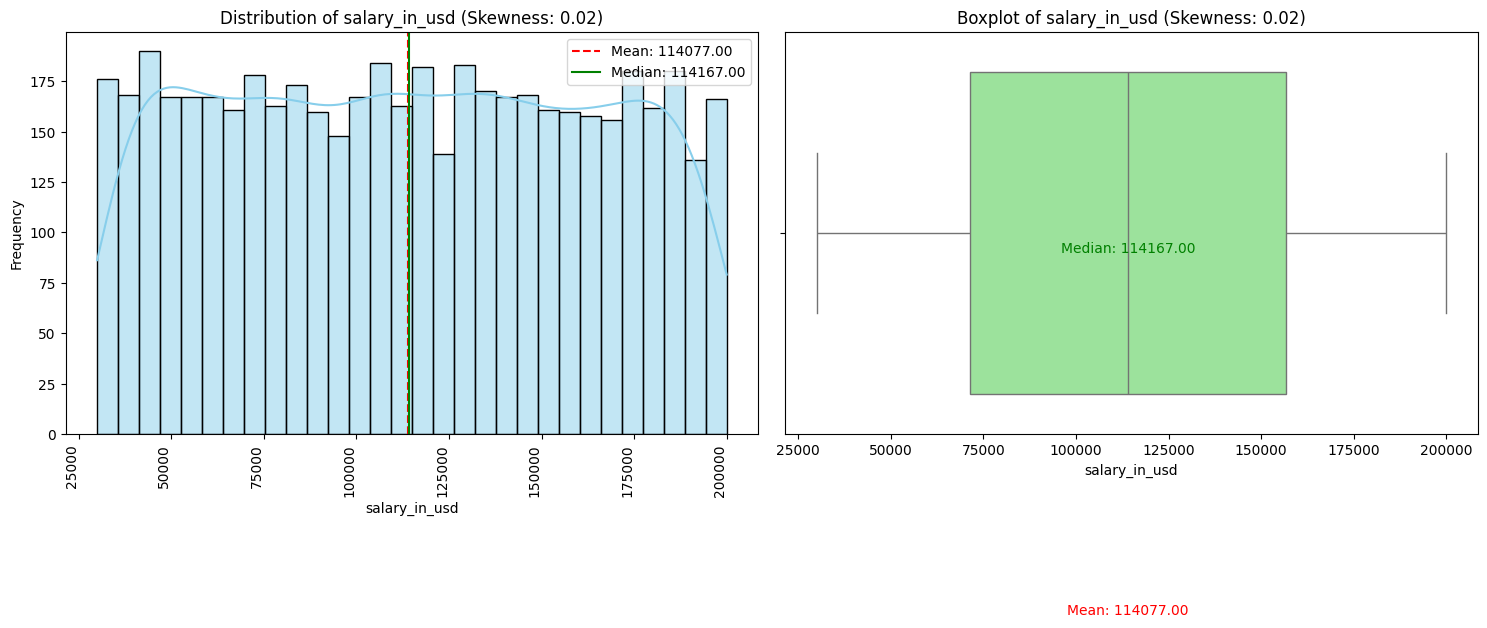

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to print summary statistics for numerical columns
def num_summary(dataframe, numerical_col):
    print('\n***************', numerical_col, '***************\n')
    print(dataframe[numerical_col].describe())

# Function for univariate plots (histogram and boxplot) for numerical columns
def univariate_plots(dataframe, numerical_cols):
    for col in numerical_cols:
        # Call num_summary to print statistics
        num_summary(dataframe, col)

        # Calculate skewness for each numerical column
        skewness = dataframe[col].skew()

        # Plot distribution and boxplot
        plt.figure(figsize=(15, 7))

        # Plot Histogram with KDE
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], kde=True, color='skyblue', bins=30)

        # Add vertical lines for mean and median
        mean_value = dataframe[col].mean()
        median_value = dataframe[col].median()
        plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
        plt.axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')

        # Set title and labels
        plt.title(f'Distribution of {col} (Skewness: {skewness:.2f})')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.xticks(rotation=90, ha='right')

        # Plot Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=dataframe[col], color='lightgreen')

        # Add mean and median on boxplot as text annotations
        plt.text(mean_value, 0.95, f'Mean: {mean_value:.2f}', color='red', horizontalalignment='center')
        plt.text(median_value, 0.05, f'Median: {median_value:.2f}', color='green', horizontalalignment='center')

        # Set title for boxplot
        plt.title(f'Boxplot of {col} (Skewness: {skewness:.2f})')

        plt.tight_layout()
        plt.show()

# Run univariate analysis (print summary stats and plot)
univariate_plots(df, num_cols)


# ***Bivariate Analysis - Categorical Columns***

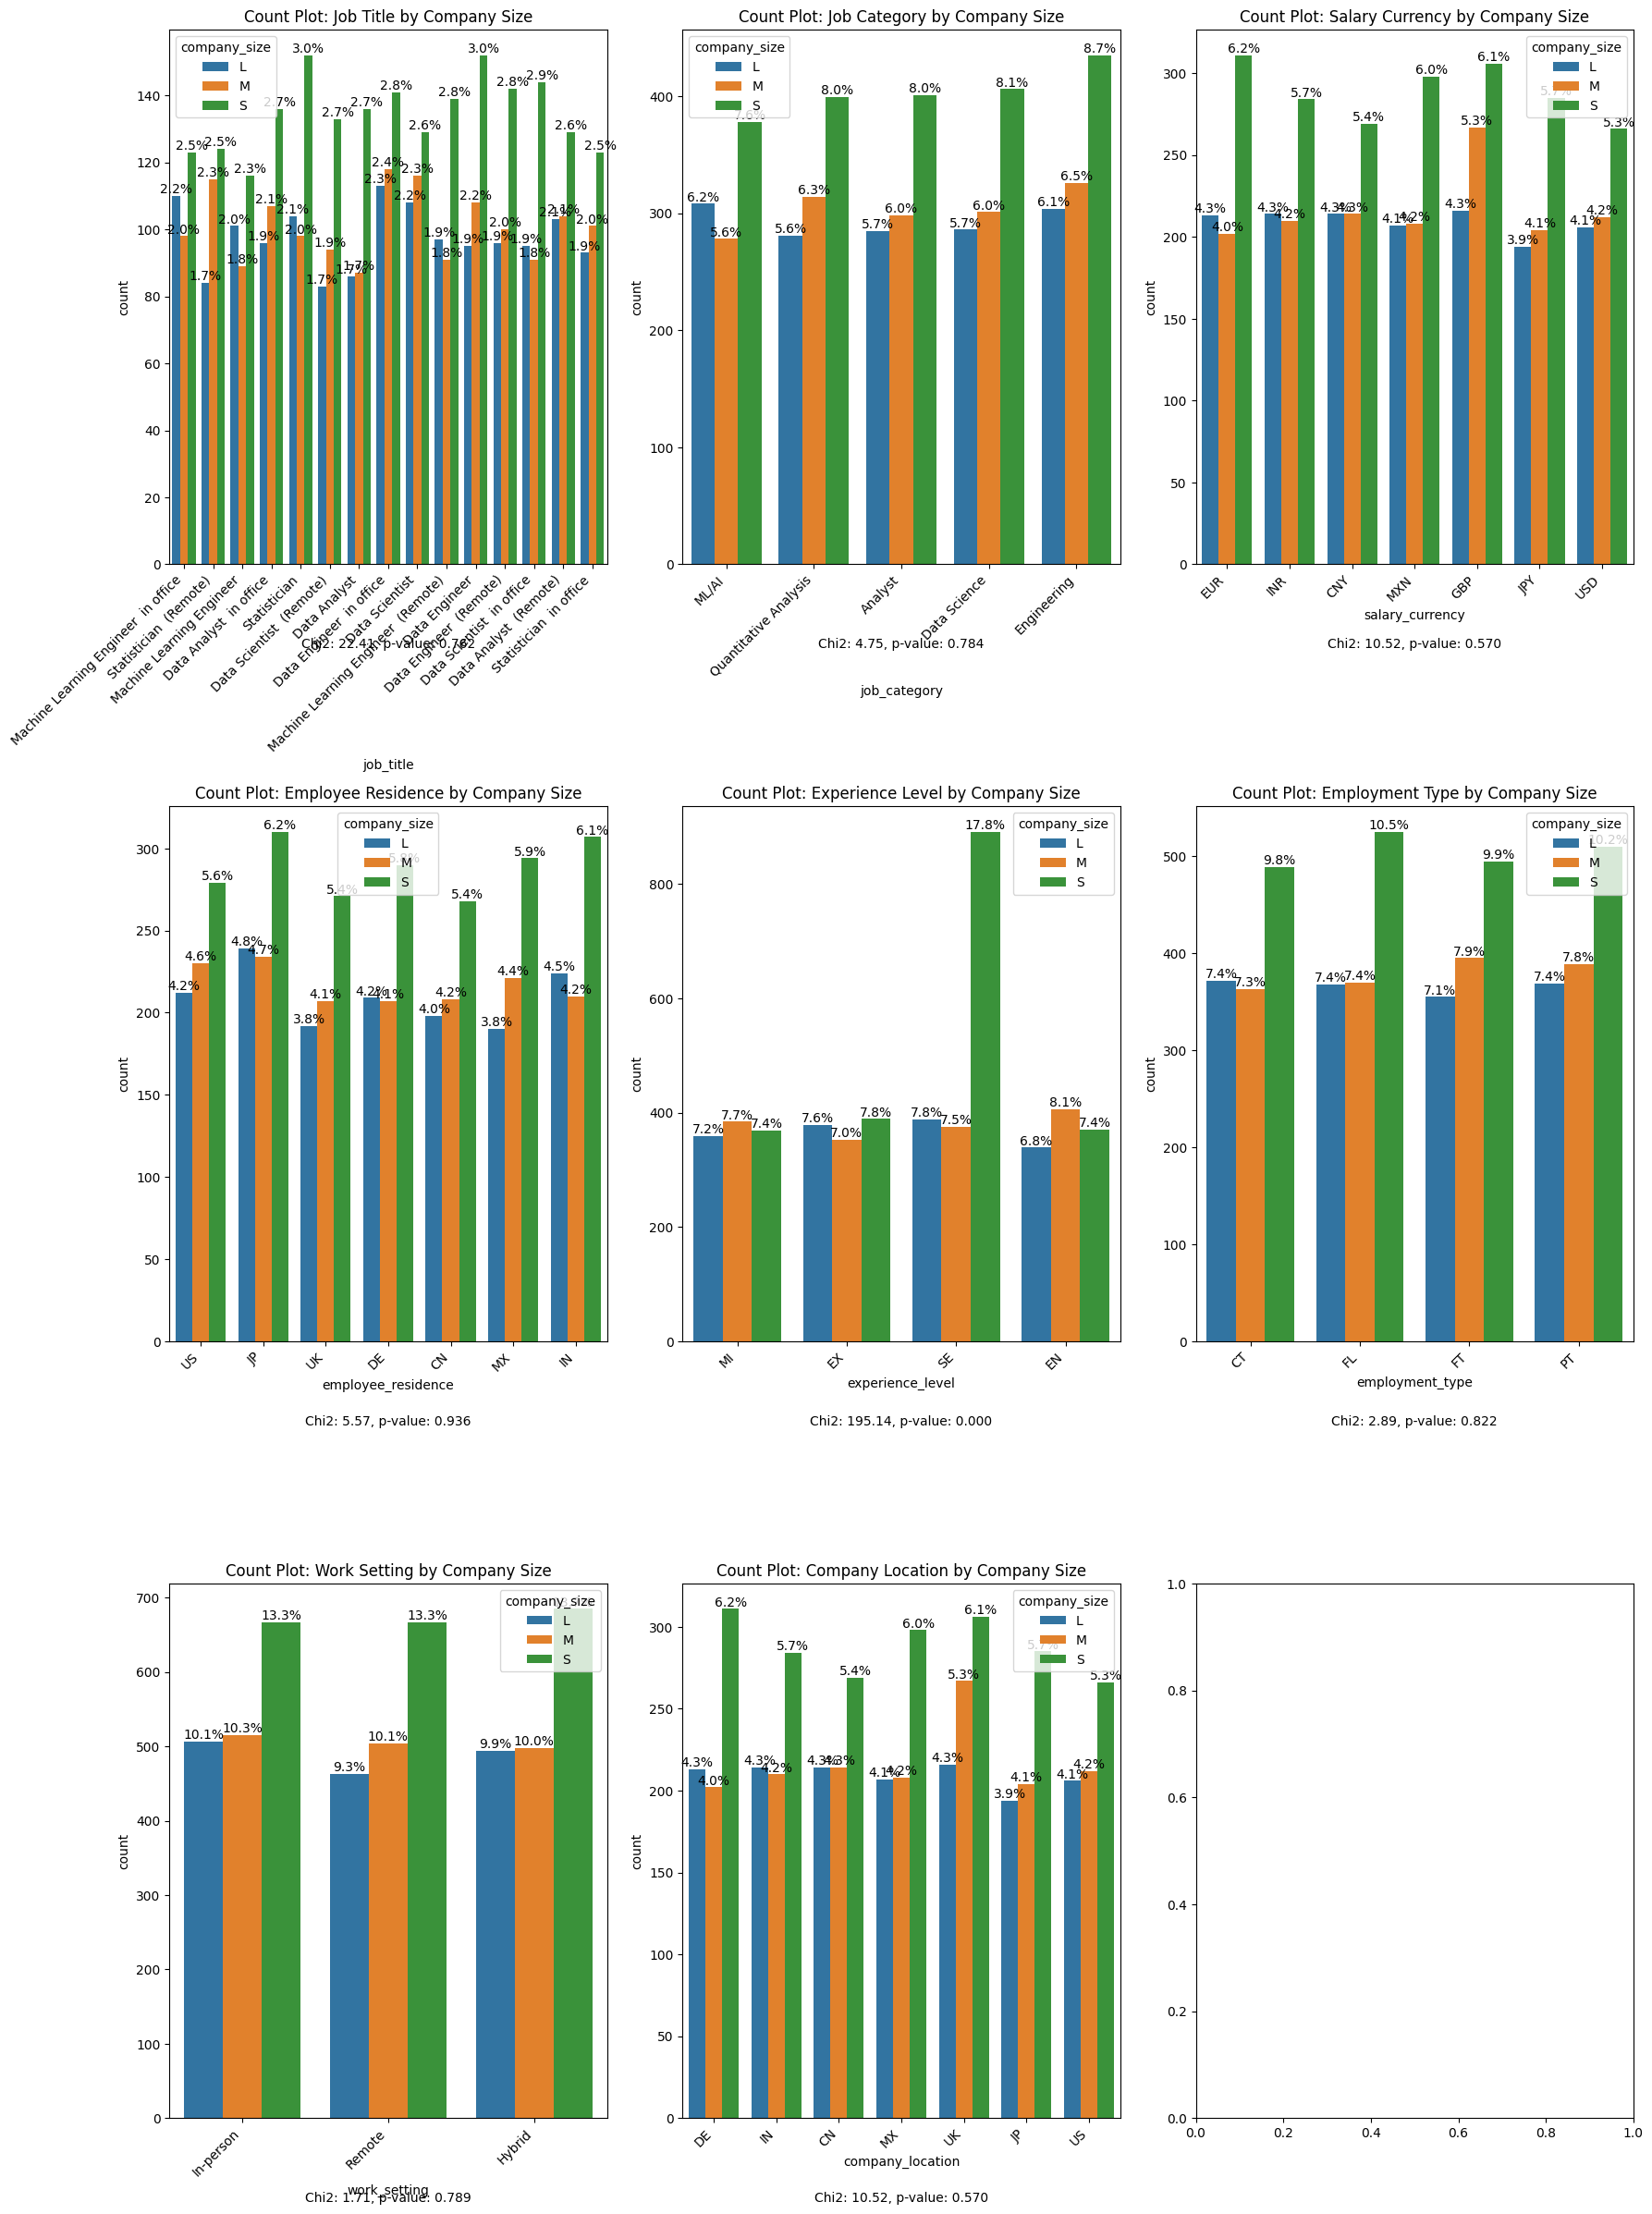

In [32]:
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Chi-Square and p-value
def chi_square_test(dataframe, feature, target):
    contingency_table = pd.crosstab(dataframe[feature], dataframe[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

# List of features to plot, adjusted to your dataset
features = [
    ('job_title', 'Count Plot: Job Title by Company Size'),
    ('job_category', 'Count Plot: Job Category by Company Size'),
    ('salary_currency', 'Count Plot: Salary Currency by Company Size'),
    ('employee_residence', 'Count Plot: Employee Residence by Company Size'),
    ('experience_level', 'Count Plot: Experience Level by Company Size'),
    ('employment_type', 'Count Plot: Employment Type by Company Size'),
    ('work_setting', 'Count Plot: Work Setting by Company Size'),
    ('company_location', 'Count Plot: Company Location by Company Size')
]

# Create subplots with enough space
fig, axes = plt.subplots(3, 3, figsize=(18, 24)) # Adjusted grid size for 8 features

# Loop through the features for count plots
for i, (feature, title) in enumerate(features):
    ax = axes[i // 3, i % 3] # Determine the correct subplot
    sns.countplot(data=df, x=feature, hue='company_size', ax=ax)
    ax.set_title(title)

    # Calculate total counts for percentages
    total = len(df)

    # Add percentage annotations on top of the bars
    for p in ax.patches:
        height = p.get_height()
        if height == 0: # Skip if the bar height is 0 (0.0%)
            continue
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

    # Perform Chi-Square test and get results
    chi2, p = chi_square_test(df, feature, 'company_size')
    ax.text(0.5, -0.15, f'Chi2: {chi2:.2f}, p-value: {p:.3f}', ha='center', va='center', transform=ax.transAxes)

    # Use plt.xticks() for proper x-tick label rotation if needed
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


# Numerical Columns

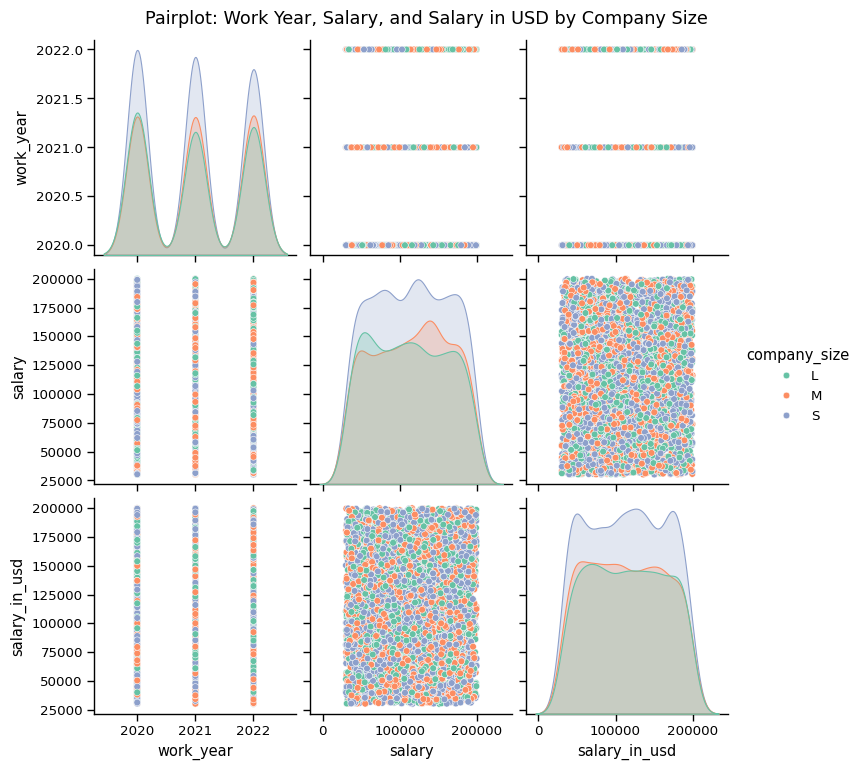

In [33]:
# Create a DataFrame for the selected columns
plot_data = df[['work_year', 'salary', 'salary_in_usd', 'company_size']]

# Set the context for the plot
sns.set_context("paper", font_scale=1.1)

# Create pairplot
pair_plot = sns.pairplot(plot_data, hue='company_size', palette="Set2")

# Set titles
pair_plot.fig.suptitle('Pairplot: Work Year, Salary, and Salary in USD by Company Size', y=1.02)

# Show the plot
plt.show()


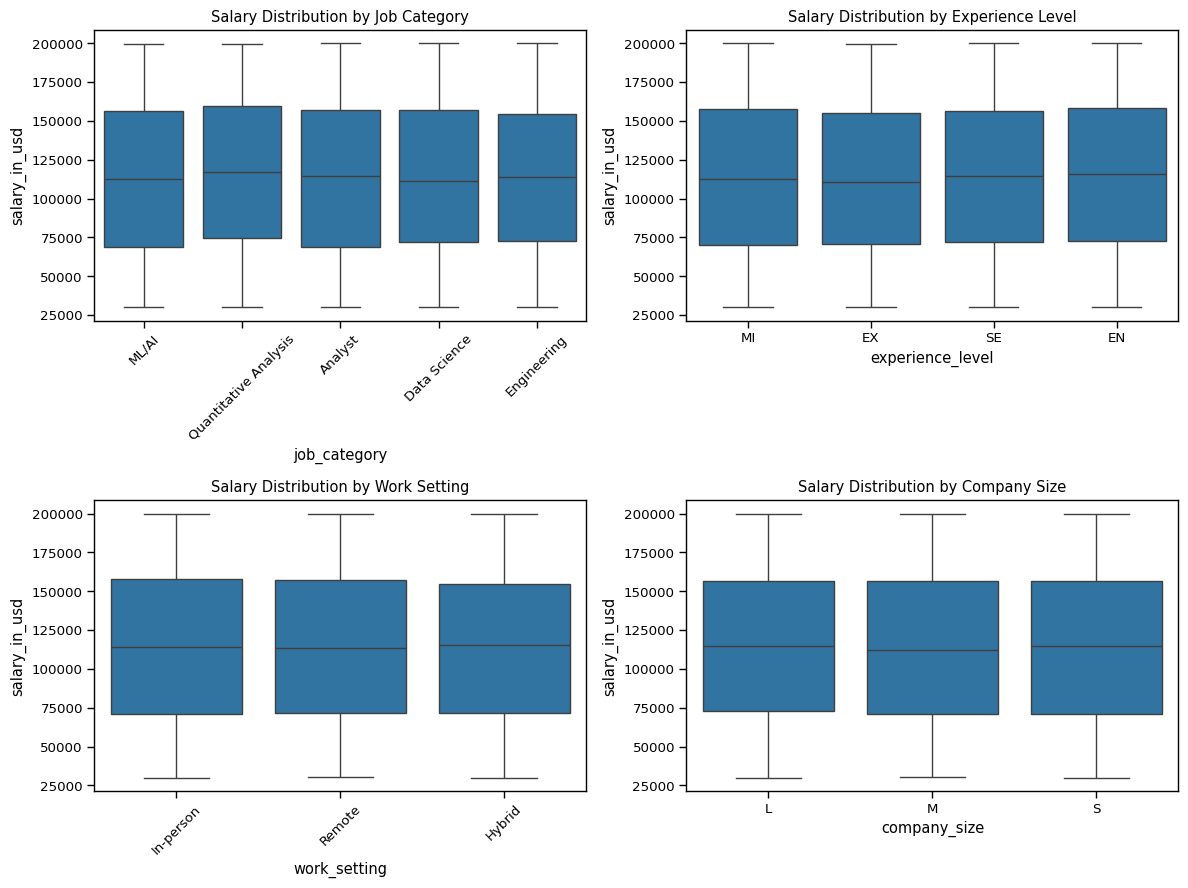

In [34]:
# Plot salary distribution by job_category, experience_level, work_setting, and company_size
plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
sns.boxplot(x='job_category', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')

plt.subplot(2, 2, 3)
sns.boxplot(x='work_setting', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Work Setting')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Company Size')

plt.tight_layout()
plt.show()

# Dealing with Outliers

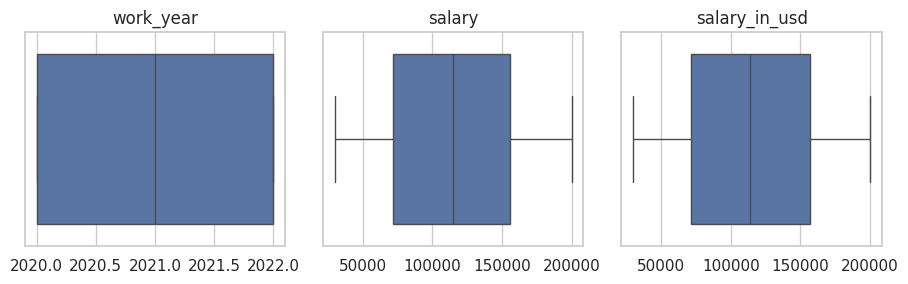

In [35]:
sns.set(style="whitegrid")

numerical_columns = [col for col in df.columns if df[col].dtype !='object']

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 3, num_rows * 3))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

The boxplot shows that all data points lie within the whiskers, suggesting that there are no outliers present in the dataset.